In [180]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

import sys
sys.path.append("..")
from KMeans import MyKMeans
from KMedian import MyKMedian
from sklearn.datasets import make_blobs
import random

In [181]:
data = pd.read_csv("../../datasets/loans.csv")
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [182]:
data = data.loc[:, ['ApplicantIncome', 'LoanAmount']]
data.head(2)

,ApplicantIncome,LoanAmount
0,4583,128.0
1,3000,66.0


In [183]:
X = data.values
print(X.shape)

(381, 2)


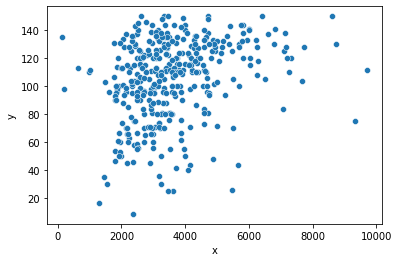

In [184]:
sns.scatterplot(X[:,0], X[:, 1])
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [185]:
k = 4
kmeans = MyKMeans()
kmeans.fit(X, k)
centroids, clusters = kmeans.centroids, kmeans.clusters

Text(0, 0.5, 'y')

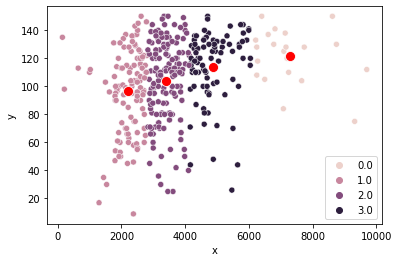

In [186]:
sns.scatterplot(X[:,0], X[:, 1], hue=clusters)
sns.scatterplot(centroids[:,0], centroids[:, 1], s=100, color='red')
plt.xlabel('x')
plt.ylabel('y')

In [187]:
k = 4
kmedian = MyKMedian()
kmedian.fit(X, k)
centroids2, clusters2 = kmedian.centroids, kmedian.clusters

Text(0, 0.5, 'y')

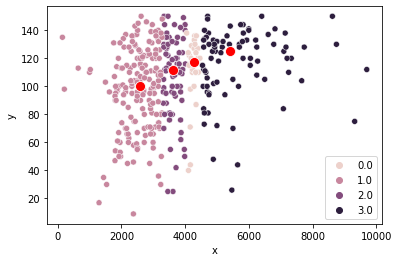

In [188]:
sns.scatterplot(X[:,0], X[:, 1], hue=clusters2)
sns.scatterplot(centroids2[:,0], centroids2[:, 1], s=100, color='red')
plt.xlabel('x')
plt.ylabel('y')